In [7]:
import sys
sys.path.append("/s/ls4/users/grartem/RL_robots/continuous-grid-arctic/")
sys.path.append("/s/ls4/users/grartem/RL_robots/RL_robotSim/")
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [8]:
os.chdir("/s/ls4/users/grartem/RL_robots/RL_robotSim/")

In [9]:
import time
import gym
import pyhocon
import numpy as np
import pandas as pd
import ray
from ray.rllib.agents.ppo.ppo import PPOTrainer
from ray.rllib.agents.ddpg.td3 import TD3Trainer
import pygame
import matplotlib.pyplot as plt
%matplotlib inline

import MyMisc

# Prepare env and model

In [10]:
configs = pyhocon.ConfigFactory.parse_file("/s/ls4/users/grartem/RL_robots/RL_robotSim/Configs/FollowerContinuous/PPO_obst.conf")
CONFIG = configs["ppo_env4feats12_train5v6"].as_plain_ordered_dict()
CONFIG["config"]["num_workers"]=1

In [11]:
CONFIG["config"]["env_config"]

OrderedDict([('name', 'Test-Cont-Env-Auto-v0'),
             ('base_env_config',
              OrderedDict([('add_obstacles', True),
                           ('warm_start', 0),
                           ('max_steps', 10000),
                           ('framerate', 5000),
                           ('obstacle_number', 35),
                           ('constant_follower_speed', False),
                           ('early_stopping',
                            OrderedDict([('max_distance_coef', 1.4),
                                         ('low_reward', -300)])),
                           ('random_frames_per_step', [2, 20]),
                           ('leader_speed_regime',
                            OrderedDict([('0', [0.2, 1]),
                                         ('200', 1),
                                         ('1000', [0.5, 1]),
                                         ('1500', 0.75),
                                         ('2000', 0),
                              

In [12]:
EXPERIMENT_DIR = "/s/ls4/users/grartem/RL_robots/RL_robotSim/results/FollowerContinuous/env4/PPO/env4feats12_train/ppo_env4feats12_train5v6/PPO_continuous-grid_448ca_00002_2_2022-06-14_16-10-32/"
checkpoint_path = EXPERIMENT_DIR + "/checkpoint_000600/checkpoint-600"

In [13]:
trainer = ray.rllib.agents.registry.get_trainer_class(CONFIG["run"])(CONFIG["config"])
trainer.restore(checkpoint_path)

env = MyMisc.continuous_env_maker(config=CONFIG["config"]["env_config"])

(RolloutWorker pid=27991) pygame 2.1.2 (SDL 2.0.16, Python 3.8.0)
(RolloutWorker pid=27991) Hello from the pygame community. https://www.pygame.org/contribute.html


(RolloutWorker pid=27991) /s/ls4/users/grartem/RL_robots/continuous_grid_arctic/continuous_grid_arctic/follow_the_leader_continuous_env.py:279: UserWarning: Одновременно заданы и random_frames_per_step и frames_per_step, будет использоваться random_frames_per_step
(RolloutWorker pid=27991)   warn(
(RolloutWorker pid=27991) /s/ls4/users/grartem/anaconda3/envs/rl_robots/lib/python3.8/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
(RolloutWorker pid=27991)   logger.warn(


(RolloutWorker pid=27991) ===Запуск симуляции номер 0===


(RolloutWorker pid=27991) Failed to create secure directory (/run/user/1556/pulse): No such file or directory
(RolloutWorker pid=27991) ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
(RolloutWorker pid=27991) ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
(RolloutWorker pid=27991) ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
(RolloutWorker pid=27991) ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
(RolloutWorker pid=27991) ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
(RolloutWorker pid=27991) ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
(RolloutWorker pid=27991) ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
(RolloutWorker pid=27991) ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default
2022-07-2

In [27]:
env.env.env.max_dev

50

# Test episode

In [19]:
# Start env episode
seed_i = 0
env.seed(seed_i)
obs = env.reset()
done = False
total_reward = 0.0

===Запуск симуляции номер 0===


Failed to create secure directory (/run/user/1556/pulse): No such file or directory
ALSA lib confmisc.c:767:(parse_card) cannot find card '0'
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_card_driver returned error: No such file or directory
ALSA lib confmisc.c:392:(snd_func_concat) error evaluating strings
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1246:(snd_func_refer) error evaluating name
ALSA lib conf.c:4568:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5047:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2565:(snd_pcm_open_noupdate) Unknown PCM default


In [10]:
raw_obs

{'numerical_features': array([1190.   ,  680.   ,    0.   ,   45.   ,    0.   , 1064.135,
         554.135,    0.   ,   45.   ,    0.   ], dtype=float32),
 'leader_target_point': (1200, 690),
 'LeaderPositionsTracker_v2': (deque([array([1064.13499295,  554.13499295]),
         array([1072.00155589,  562.00155589]),
         array([1079.86811883,  569.86811883]),
         array([1087.73468177,  577.73468177]),
         array([1095.60124471,  585.60124471]),
         array([1103.46780765,  593.46780765]),
         array([1111.33437059,  601.33437059]),
         array([1119.20093353,  609.20093353]),
         array([1127.06749647,  617.06749647]),
         array([1134.93405942,  624.93405942]),
         array([1142.80062236,  632.80062236]),
         array([1150.6671853,  640.6671853]),
         array([1158.53374824,  648.53374824]),
         array([1166.40031118,  656.40031118]),
         array([1174.26687412,  664.26687412]),
         array([1182.13343706,  672.13343706]),
         arra

In [11]:
# run N steps
NNobs_history, raw_obs_history, reward_history, info_history, actions_hist = [], [], [], [], []
start_time = time.time()
for i in range(50):
    # Compute a single action, given the current observation
    # from the environment.
    NNobs_history.append(obs)
    raw_obs = env.env.env._get_obs()
    raw_obs_history.append({
        #'LeaderTrackDetector_radar': raw_obs['LeaderTrackDetector_radar'],
        'LeaderCorridor_lasers': raw_obs['LeaderCorridor_lasers']
    })
    
    action = trainer.compute_single_action(obs, explore=False)
    # Apply the computed action in the environment.
    obs, reward, done, info = env.step(action)
    
    actions_hist.append(action)
    reward_history.append(reward)
    info_history.append(info)
    # Sum up rewards for reporting purposes.
    total_reward += reward
elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print(elapsed_time)

00:00:03


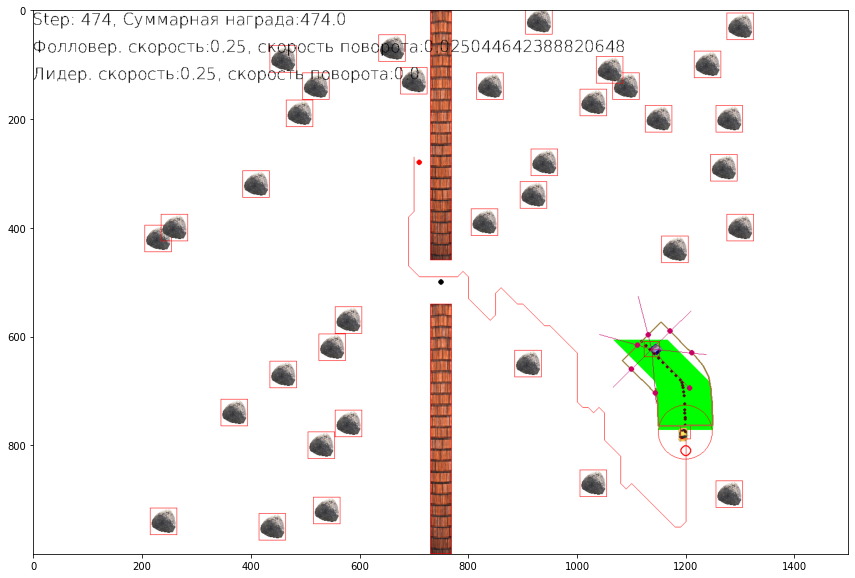

In [12]:
env.render()
plt.figure(figsize=(15,10))
plt.imshow(pygame.surfarray.array3d(env.gameDisplay).transpose((1,0,2)))

In [13]:
for i in range(len(raw_obs_history)):
    print("Raw observes:")
    print(raw_obs_history[i])
    print("NN inputs:")
    print(NNobs_history[i])
    print("Action:")
    print(actions_hist[i])
    print("Reward:")
    print(reward_history[i])
    print("Info:")
    print(info_history[i])
    print("#"*50)

Raw observes:
{'LeaderCorridor_lasers': array([3.1045965e-05, 2.3782590e-05, 3.1045965e-05, 1.0000000e+02,
       1.0000000e+02, 1.0000000e+02, 1.0000000e+02], dtype=float32)}
NN inputs:
[3.1045965e-07 2.3782590e-07 3.1045965e-07 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00]
Action:
[-0.18982133  0.8013616 ]
Reward:
1.0
Info:
{'mission_status': 'in_progress', 'agent_status': 'moving', 'leader_status': 'moving'}
##################################################
Raw observes:
{'LeaderCorridor_lasers': array([2.7689273e-05, 2.4092129e-05, 3.6392939e-05, 1.4884147e-04,
       1.0000000e+02, 1.0000000e+02, 1.0000000e+02], dtype=float32)}
NN inputs:
[2.7689273e-07 2.4092128e-07 3.6392939e-07 1.4884147e-06 1.0000000e+00
 1.0000000e+00 1.0000000e+00]
Action:
[0.03109662 1.5276846 ]
Reward:
1.0
Info:
{'mission_status': 'in_progress', 'agent_status': 'moving', 'leader_status': 'moving'}
##################################################
Raw observes:
{'LeaderCorridor_lasers': array(